# Analysis of NTK Correction Term Scaling Laws with respect to L

We analyze how the spectral radius of the NTK correction term scales with respect to network depth (L)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress

In [ ]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large_ntk_corrections"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("ntk_correction_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Analysis by Configuration

In [ ]:
def plot_config_scaling(data, fixed_params):
    # Get unique values for each fixed parameter
    unique_values = {p: sorted(list(set(d[p] for d in data))) for p in fixed_params}
    
    # Group data by fixed parameter combinations
    groups = {}
    for d in data:
        key = tuple(d[p] for p in fixed_params)
        if key not in groups:
            groups[key] = []
        groups[key].append((d['L'], d['mean_spectral_radius'], d['std_spectral_radius']))

    # Sort groups by number of points
    sorted_groups = sorted(groups.items(), key=lambda x: len(x[1]), reverse=True)

    # Create figure with subplots for each configuration
    n_configs = len(groups)
    fig, axes = plt.subplots(n_configs + 1, 1, figsize=(10, 4*(n_configs + 1)))
    
    # Plot individual configurations
    for idx, (config, values) in enumerate(sorted_groups[::5]):
        ax = axes[idx]
        sorted_values = sorted(values, key=lambda x: x[0])
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        yerr = [v[2] for v in sorted_values]
        
        ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, markersize=8)
        if len(x) > 1:
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
        
        config_str = ", ".join([f"{p}={v}" for p,v in zip(fixed_params, config)])
        ax.set_title(f'Spectral Radius vs L\n{config_str}')
        ax.set_xlabel('L')
        ax.set_ylabel('Spectral Radius')
        ax.set_yscale('log')
        ax.grid(True)
        ax.legend()

    # Plot all points together in the last subplot
    ax = axes[-1]
    all_L = []
    all_radius = []
    all_std = []
    for group_values in groups.values():
        for L, radius, std in group_values:
            all_L.append(L)
            all_radius.append(radius)
            all_std.append(std)
            
    ax.errorbar(all_L, all_radius, yerr=all_std, fmt='o', alpha=0.3, capsize=2, markersize=4)
    ax.set_title('All Configurations: Spectral Radius vs L')
    ax.set_xlabel('L')
    ax.set_ylabel('Spectral Radius')
    ax.set_yscale('log')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

Analyzing depth (L) scaling for each configuration...


/tmp/ipykernel_50446/3471916956.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


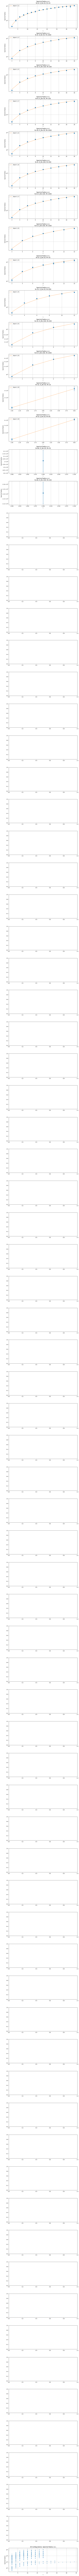

In [ ]:
# Plot scaling with respect to L for each (N,D,M) configuration
print("Analyzing depth (L) scaling for each configuration...")
plot_config_scaling(data, ['N', 'D_IN', 'M'])